In [146]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics


1. Apply Linear Regression to the provided dataset using underlying steps.
a. Import the given “Salary_Data.csv”
b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c. Train and predict the model.
d. Calculate the mean_squared error
e. Visualize both train and test data using scatter plot.

In [147]:
### reading dataset
data_df = pd.read_csv("Datasets/Salary_Data.csv")
X = data_df[["YearsExperience"]]
y = data_df[["Salary"]]

In [148]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [149]:
### Splitting dataset to 1/3 test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [150]:
#X_train, X_test, y_train, y_test

In [151]:
### fitting linear regression
reg = LinearRegression().fit(X_train, y_train)

In [152]:
reg.score(X_train,y_train)

0.9497219769351765

In [153]:
y_pred = reg.predict(X_test)

In [154]:
mse = mean_squared_error(y_test, y_pred)

In [155]:
### mean squared error
mse

24360379.483533412

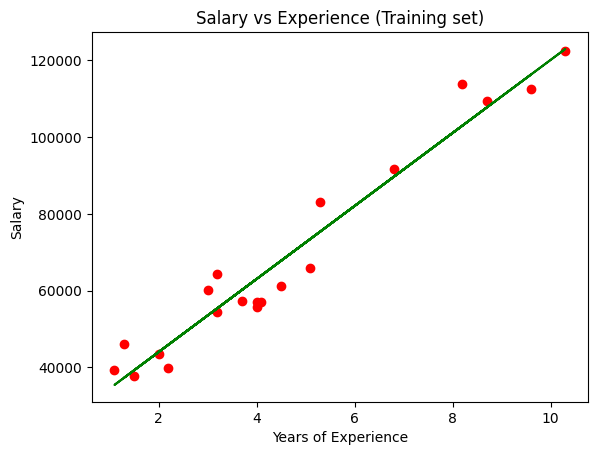

In [156]:
# Visualization for Training Data
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, reg.predict(X_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

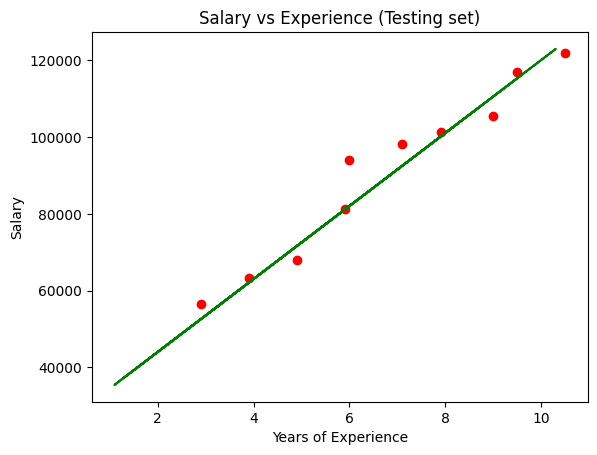

In [157]:
# Visualization for Test Data
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, reg.predict(X_train), color = "green")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

2. Apply K means clustering in the dataset provided:
• Remove any null values by the mean.
• Use the elbow method to find a good number of clusters with the K-Means algorithm
• Calculate the silhouette score for the above clustering

In [158]:
creditcard_data_df = pd.read_csv("Datasets/K-Mean_Dataset.csv")
creditcard_data_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [159]:
### checking null values
creditcard_data_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [160]:
### filling empty values with mean
creditcard_data_df.drop(['CUST_ID'],inplace=True,axis=1)
creditcard_data_df['MINIMUM_PAYMENTS'].fillna(value=creditcard_data_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
creditcard_data_df['CREDIT_LIMIT'].fillna(value=creditcard_data_df['CREDIT_LIMIT'].mean(),inplace=True)

In [169]:
# K means with 3 clusters and feature scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(creditcard_data_df)
print(km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(creditcard_data_df)
score = metrics.silhouette_score(creditcard_data_df, y_cluster_kmeans)
print(score)


KMeans(n_clusters=3)
0.46504469672047816


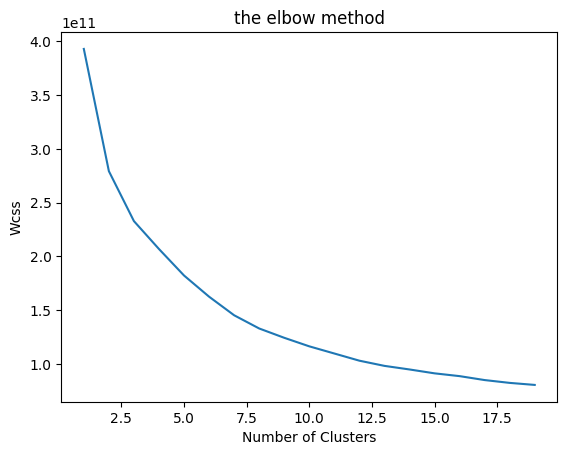

In [162]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(creditcard_data_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [163]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_data_df)

y_cluster_kmeans = kmeans.predict(creditcard_data_df)
silhouette_score = metrics.silhouette_score(creditcard_data_df, y_cluster_kmeans)
print(silhouette_score)

0.3810874517610816


In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_data_df)

In [170]:
# K means with 3 clusters and feature scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit( creditcard_df_scaled)
print(km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(creditcard_df_scaled)
from sklearn import metrics
score = metrics.silhouette_score(creditcard_df_scaled, y_cluster_kmeans)
print(score)


KMeans(n_clusters=3)
0.25055570796307736


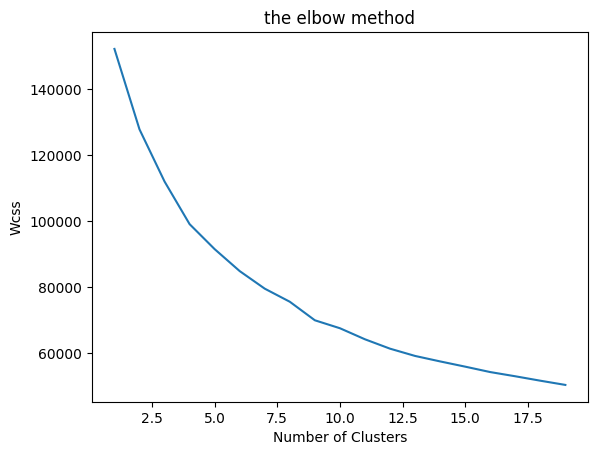

In [166]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(creditcard_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

We can clearly see the Elbow is at Number of Clusters at 8
so, Number of Clusters = 8

In [167]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_df_scaled)
#print(labels)
y_cluster_kmeans = kmeans.predict(creditcard_df_scaled)
scaled_silhouette_score = metrics.silhouette_score(creditcard_df_scaled, y_cluster_kmeans)

In [168]:
print("silhouette score after scaling : " +scaled_silhouette_score)

0.20854008021562268


The Silhouette score didn't improve after feature scaling using for K Means
